In [2]:
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         
import seaborn as sns

In [3]:
data = pd.read_csv("ecommerceDataset.csv")


In [4]:
data.shape


(50424, 2)

In [57]:
labels = []
for x in data["Label"].unique():
    labels.append(x)

In [9]:
data.head()

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100%..."
4,Household,Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


In [10]:
data.describe()

,Label,Text
count,50424,50423
unique,4,27801
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19312,30


In [11]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

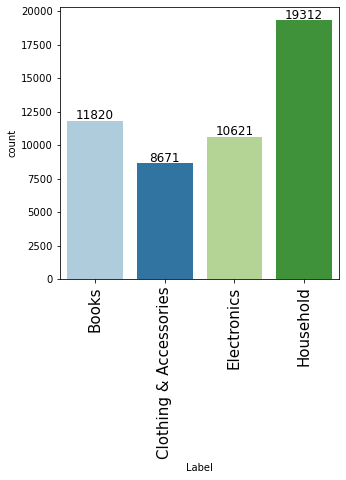

In [12]:
labeled_barplot(data, "Label")

In [18]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['Text'] = data['Text'].apply(lambda x: strip_html(str(x)))

data.head()

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100%..."
4,Household,Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


In [19]:
def replace_contractions(text):
    return contractions.fix(text)

data['Text'] = data['Text'].apply(lambda x: replace_contractions(str(x)))

data.head()

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100%..."
4,Household,Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


In [20]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['Text'] = data['Text'].apply(lambda x: remove_numbers(x))

data.head()

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,"Cuisinart CCO-BKN Deluxe Electric Can Opener, ..."
2,Household,Anchor Penta Amp -Way Switch (White) - Pack ...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, % Po..."
4,Household,Chef's Garage Slot Edge Grip Kitchen Knife Sh...


In [21]:
data['Text'] = data.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1)


In [22]:
data.head()

,Label,Text
0,Household,"[Styleys, Wrought, Iron, Coat, Rack, Hanger, C..."
1,Household,"[Cuisinart, CCO-BKN, Deluxe, Electric, Can, Op..."
2,Household,"[Anchor, Penta, Amp, -Way, Switch, (, White, )..."
3,Clothing & Accessories,"[Proline, Men, 's, Track, Jacket, Proline, Wov..."
4,Household,"[Chef, 's, Garage, Slot, Edge, Grip, Kitchen, ..."


In [32]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['Text'] = data.apply(lambda row: normalize(row['Text']), axis=1)
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\barnw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\barnw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\barnw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\barnw\AppData\Roaming\nltk_data...


,Label,Text
0,Household,styleys work iron coat rack hanger creative fa...
1,Household,cuisinart ccobkn deluxe electric opener black ...
2,Household,anchor penta amp way switch white pack anchor ...
3,Clothing & Accessories,proline men track jacket proline weave polyest...
4,Household,chef garage slot edge grip kitchen knife sharp...


In [48]:
import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['Text'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

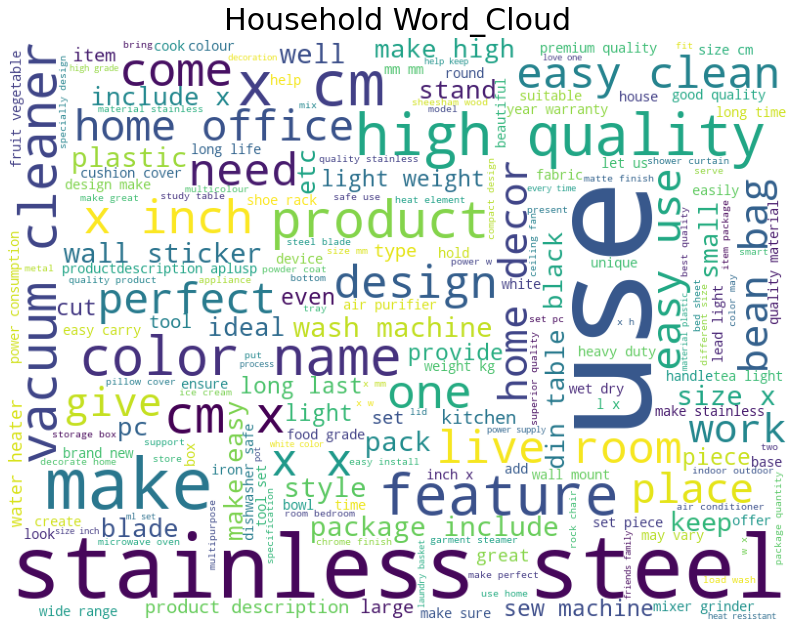

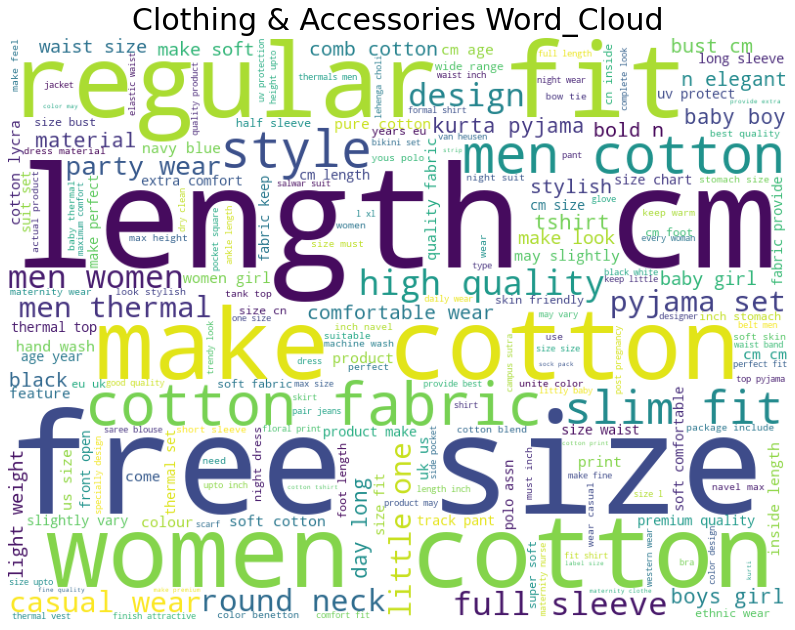

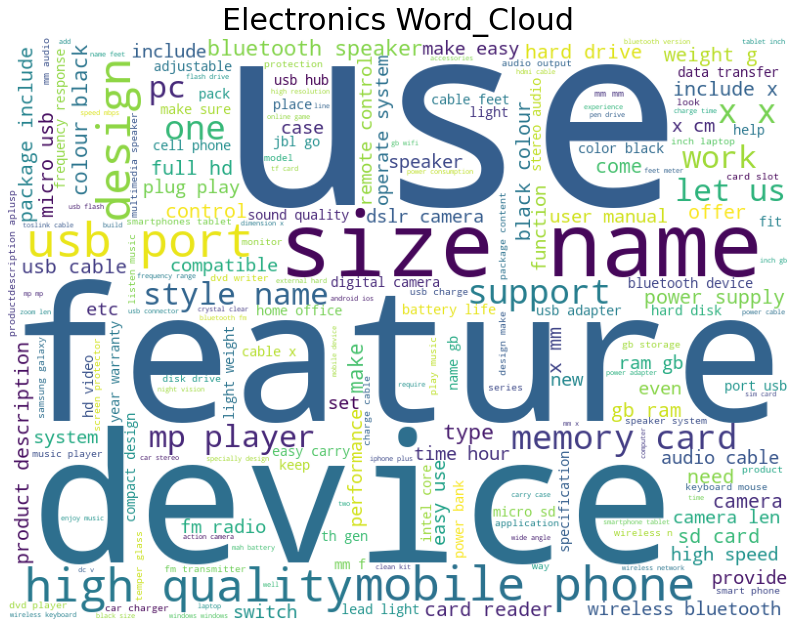

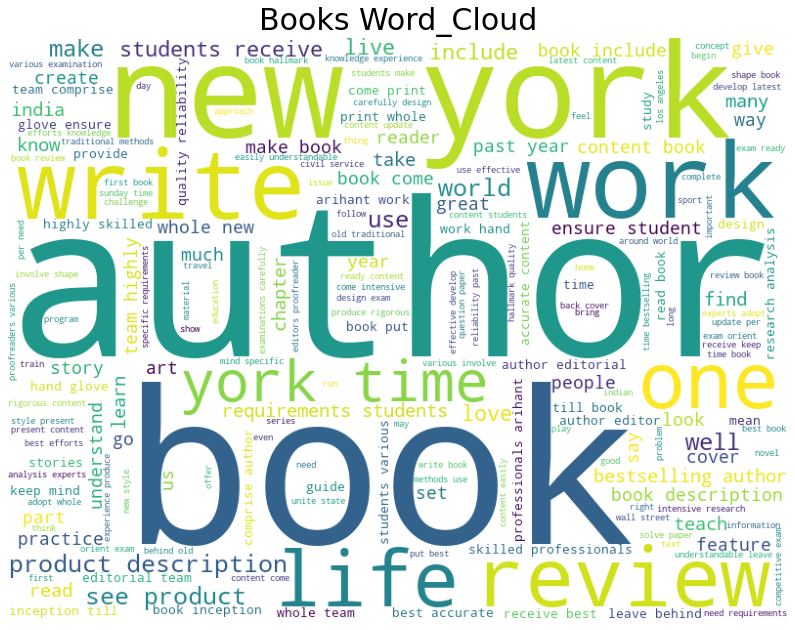

In [61]:
for x in labels:
    df = data.loc[data['Label'] == x]
    show_wordcloud(df, x +' Word_Cloud')



In [46]:
data.loc[data['Label'] == "Household"]

,Label,Text
0,Household,styleys work iron coat rack hanger creative fa...
1,Household,cuisinart ccobkn deluxe electric opener black ...
2,Household,anchor penta amp way switch white pack anchor ...
4,Household,chef garage slot edge grip kitchen knife sharp...
5,Household,syga electric knife sharpener multifunctional ...
...,...,...
50414,Household,urban ladder eddings studyoffice desk natural ...
50415,Household,focus january focus current affairs magazine r...
50416,Household,munchkin fold bottle dry rack color may vary l...
50418,Household,fabeya arabica coffee body scrub polish parabe...


In [63]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                
data_features = bow_vec.fit_transform(data['Text'])

data_features = data_features.toarray()

In [67]:
data_features.shape
labels = data['Label']


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.968764971896195


In [70]:
base_ln = [x for x in range(1, 25)]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [71]:
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

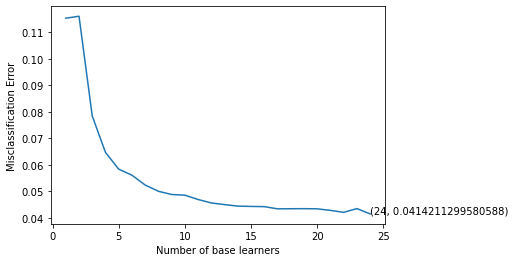

In [72]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [73]:
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9653622421998942

In [74]:
result =  clf.predict(X_test)

[[3480   14   12   86]
 [  15 2560   11   53]
 [  30   11 2936  131]
 [  60   49   52 5628]]
0.9653622421998942


<AxesSubplot:>

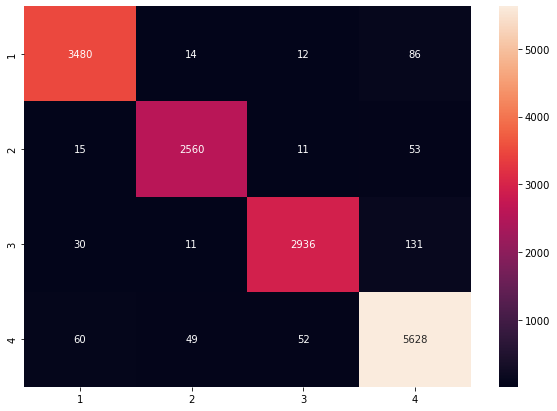

In [76]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "1234"],
                  columns = [i for i in "1234"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

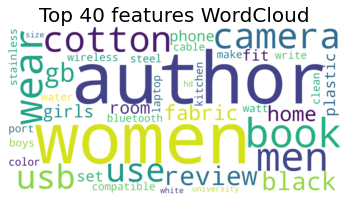

In [87]:
all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(data['Text'])

data_features = data_features.toarray()

data_features.shape

(50424, 2000)

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.9652546571122846


In [80]:
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

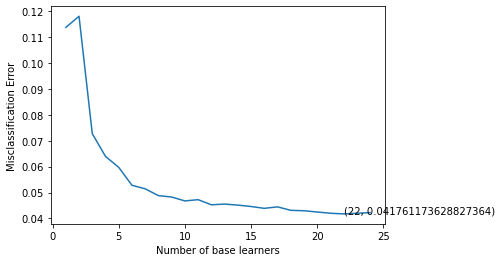

In [81]:
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [82]:
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9656266525647805

In [83]:
result = clf.predict(X_test)


[[3478   17   17   80]
 [  15 2562   10   52]
 [  30   14 2938  126]
 [  59   47   53 5630]]
0.9656266525647805


<AxesSubplot:>

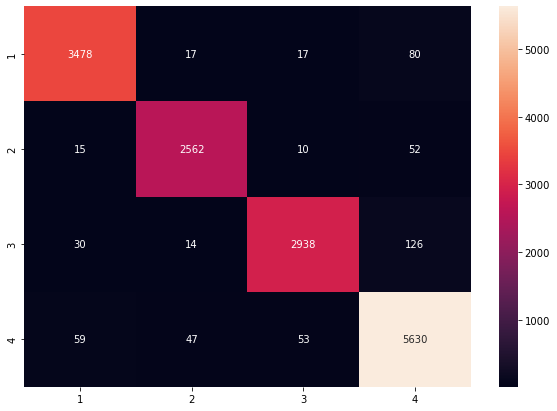

In [85]:
result =  clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "1234"],
                  columns = [i for i in "1234"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

C:\Users\barnw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


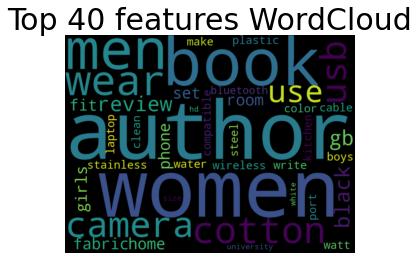

In [86]:
all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()